# Projet Python pour le data scientist : Prévision des prix des Airbnb
#### Réalisé par M.Blazevic, E.Bordais, C.Nadler, C.Voisin

## 0. Import modules et base de données

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from string import ascii_letters
import itertools
import collections
import nltk 
from nltk.corpus import stopwords
import warnings


In [64]:

data = pd.read_csv('airbnb-listings3.csv' , sep=';', low_memory= False)
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7713011,https://www.airbnb.com/rooms/7713011,20170404145355,2017-04-06,STUDIO PIGALLE W BALCONY,"In the heart of Montmarte Pigalle, this lovely...",This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",none,It is central enough for you to walk your way ...,...,9.0,8.0,9.0,NaN,Paris,strict,7,1.84,"48.88292573377615,2.3358125139068453","Host Has Profile Pic,Host Identity Verified,Is..."
1,3335054,https://www.airbnb.com/rooms/3335054,20170404145355,2017-04-05,Montmartre au pied du Sacré-Coeur !,"Ce studio de 22m2, rénové et équipé avec soin,...",A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,none,The apartment is located rue d'Orsel just belo...,...,10.0,10.0,10.0,NaN,Paris,moderate,1,0.03,"48.88301302713629,2.343468625865973","Host Has Profile Pic,Host Identity Verified,Is..."
2,10066518,https://www.airbnb.com/rooms/10066518,20170404145355,2017-04-06,LOVELY FLAT MONTMARTRE SACRE COEUR,In 2' by walk of the Sacré-Coeur and the Mouli...,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,none,"Situé en plein quartier Montmartre, vous serez...",...,10.0,10.0,10.0,NaN,Paris,moderate,2,0.89,"48.884043258037266,2.3406044314802927","Host Has Profile Pic,Host Identity Verified,Is..."
3,8100080,https://www.airbnb.com/rooms/8100080,20170404145355,2017-04-06,Appartement au pied de Montmartre,"Dans un appartement de 50m², à deux minutes du...",NaN,"Dans un appartement de 50m², à deux minutes du...",none,NaN,...,10.0,10.0,9.0,NaN,Paris,flexible,1,0.17,"48.88519518071742,2.3451007362886185","Host Has Profile Pic,Host Identity Verified,Is..."
4,7397323,https://www.airbnb.com/rooms/7397323,20170404145355,2017-04-06,Beautiful and Spacious Studio,Grd studio lumineux de 32m² avec une grande pi...,NaN,Grd studio lumineux de 32m² avec une grande pi...,none,NaN,...,10.0,8.0,10.0,NaN,Paris,flexible,1,0.11,"48.89480043872107,2.3300554723388434",Host Has Profile Pic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54508,2610162,https://www.airbnb.com/rooms/2610162,20170404145355,2017-04-06,Rue Cler at 500m from Eiffel Tower!,"Logement très calme, ensoleillé, situé derrièr...",Ce logement se trouve au 2e étage et comporte ...,"Logement très calme, ensoleillé, situé derrièr...",none,"Quartier ""vivant"" aussi bien de jour comme de ...",...,9.0,10.0,9.0,NaN,Paris,moderate,1,1.06,"48.858121148036595,2.3060024345958587","Host Has Profile Pic,Host Identity Verified,Is..."
54509,13760682,https://www.airbnb.com/rooms/13760682,20170404145355,2017-04-06,Elegant 160m Home in the heart of St Germain,Our home is in the heart to Saint-Germain-des-...,Our home is a large (160m) classic French apar...,Our home is in the heart to Saint-Germain-des-...,none,St Germain des Pres is the heart of left bank ...,...,10.0,10.0,9.0,NaN,Paris,strict,2,0.56,"48.85289626976821,2.3256957697321123","Host Has Profile Pic,Host Identity Verified,Is..."
54510,9173969,https://www.airbnb.com/rooms/9173969,20170404145355,2017-04-06,partner service test listing3,this is a test summary,NaN,this is a test summary,none,NaN,...,NaN,NaN,NaN,NaN,Paris,flexible,1,NaN,"48.8528110291481,2.3248405116672988","Host Has Profile Pic,Is Location Exact"
54511,13754942,https://www.airbnb.com/rooms/13754942,20170404145355,2017-04-06,2 bedroom appartement in a premium area,Situated in a prestigious area near the Rodin ...,NaN,Situated in a prestigious area near the Rodin ...,none,Premium neighborhoods with many wonderful cafe...,...,10.0,10.0,10.0,NaN,Paris,strict,1,0.34,"48.858549434544635,2.3167999983004584","Host Has Profil

On supprime les features qui ne sont pas utiles

In [3]:
df = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 
              'Experiences Offered', 'Thumbnail Url', 'House Rules', 'Medium Url',
              'Picture Url', 'XL Picture Url', 'Host URL', 'Host Location', 
              'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 
              'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
               'Host Verifications','Neighbourhood Group Cleansed', 'State', 
                'Market', 'Smart Location', 'Country Code', 'Country', 
               'Calendar last Scraped', 'First Review', 'Last Review', 
                'Jurisdiction Names', 'Features', 'License', 'Interaction', 'Host Name',
                'Monthly Price', 'Weekly Price'
               ], axis=1)

In [4]:
df.head()

,Name,Space,Description,Neighborhood Overview,Notes,Transit,Access,Host ID,Host Since,Host Response Time,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,STUDIO PIGALLE W BALCONY,This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",It is central enough for you to walk your way ...,"Real globetrotters, we are real Parisians with...",The flat is ideally located in Montmartre Piga...,"Subway stations: Abbesses or Pigalle. Bus, Tax...",32492446,2015-05-03,within an hour,...,9.0,9.0,9.0,9.0,8.0,9.0,strict,7,1.84,"48.88292573377615,2.3358125139068453"
1,Montmartre au pied du Sacré-Coeur !,A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,The apartment is located rue d'Orsel just belo...,The building has a digital code and intercom. ...,The studio is easily accessible. At the foot o...,"The kitchen is equipped with a refrigerator, t...",2726446,2012-06-24,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1,0.03,"48.88301302713629,2.343468625865973"
2,LOVELY FLAT MONTMARTRE SACRE COEUR,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,"Situé en plein quartier Montmartre, vous serez...","Situé en plein quartier Montmartre, vous serez...",Très bien desservi par les transports en commu...,NaN,30432969,2015-04-01,within a few hours,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2,0.89,"48.884043258037266,2.3406044314802927"
3,Appartement au pied de Montmartre,NaN,"Dans un appartement de 50m², à deux minutes du...",NaN,NaN,NaN,NaN,42773335,2015-08-28,within a few hours,...,10.0,10.0,10.0,10.0,10.0,9.0,flexible,1,0.17,"48.88519518071742,2.3451007362886185"
4,Beautiful and Spacious Studio,NaN,Grd studio lumineux de 32m² avec une grande pi...,NaN,NaN,NaN,NaN,38757332,2015-07-17,within an hour,...,10.0,9.0,9.0,10.0,8.0,10.0,flexible,1,0.11,"48.89480043872107,2.3300554723388434"


On a donc maintenant 55 features

In [5]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

## 1. Statistiques descriptives de la base de données 

### 1.0 Premières statistiques

In [6]:
#On abandonne les colonnes où les prix sont nuls pour éviter de fausser l'analyse
df=df[df['Price']!=0]

In [7]:
df['Price'].describe()

count    54458.000000
mean        94.789159
std         73.357259
min          8.000000
25%         55.000000
50%         75.000000
75%        107.000000
max        999.000000
Name: Price, dtype: float64

On remarque que le prix moyen par nuit est de 94€, avec un prix minimal de 8€, qui paraît assez incohérent avec les tarifs habituels.

Traçons la répartition des prix des Airbnb parisiens

Text(0, 0.5, 'Quantité')

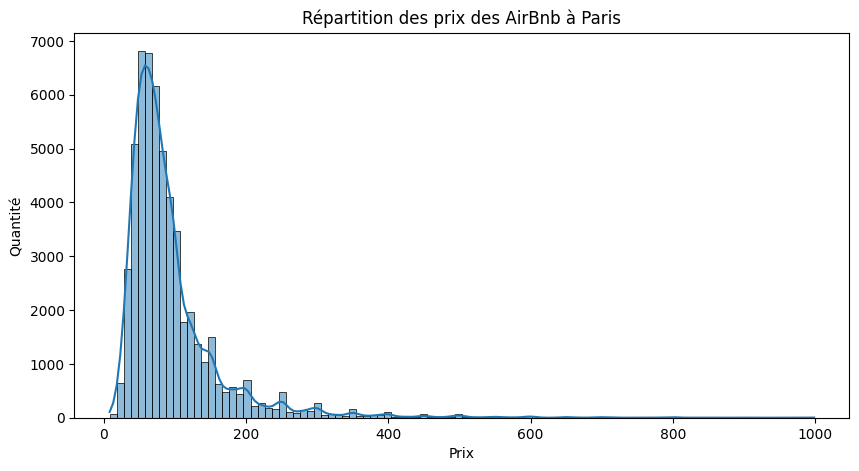

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df['Price'], kde=True, bins=int(100))
plt.title ('Répartition des prix des AirBnb à Paris')
plt.xlabel('Prix')
plt.ylabel('Quantité')

In [9]:
#Pourcentage des airbnb ayant un prix inférieur à 200€
len(df.loc[df['Price']<200])/len(df) * 100

93.09142941003815

On observe que la plus grande partie (environ 93%) des AirBnb ont un prix inférieur à 200€ par nuit.  Traçons désormais les distributions de prix en dessous et au dessus de ce seuil. 

C:\Users\ac3e2\AppData\Local\Temp\ipykernel_25580\2136324294.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax0 = sns.distplot(df[df['Price'] <= 200]['Price'], ax=axs[0], color='#FF585D')
C:\Users\ac3e2\AppData\Local\Temp\ipykernel_25580\2136324294.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distpl

Text(0.5, 1.0, 'Distribution des prix supérieurs à 200 euros')

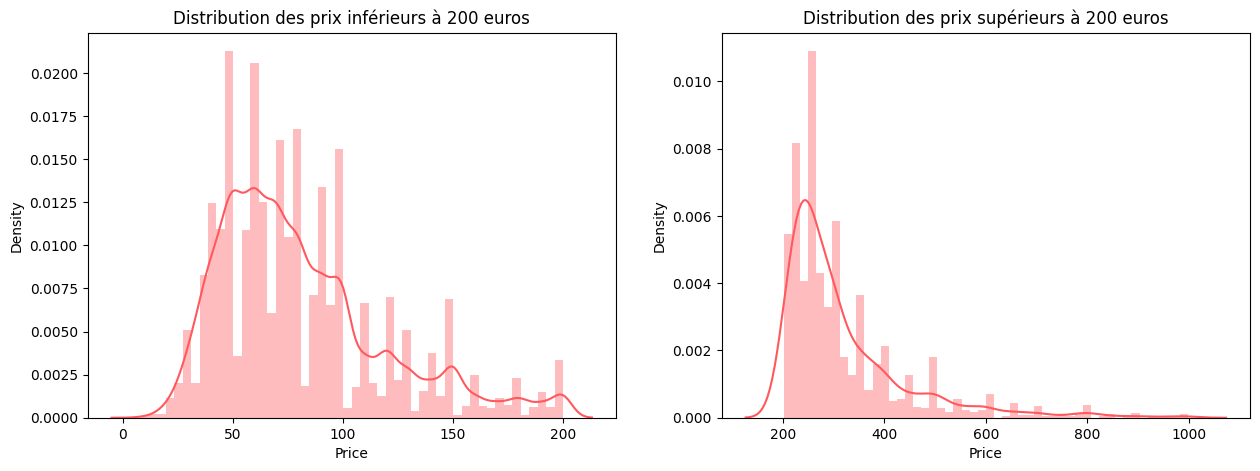

In [10]:
#warnings.simplefilter('ignore')

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax0 = sns.distplot(df[df['Price'] <= 200]['Price'], ax=axs[0], color='#FF585D')
ax0.set_title('Distribution des prix inférieurs à 200 euros')

ax1 = sns.distplot(df[df['Price'] > 200]['Price'], ax=axs[1], color='#FF585D')
ax1.set_title('Distribution des prix supérieurs à 200 euros')

Qu'est ce qui influence le plus le prix d'un Airbnb ? 
Nous avons naturellement pensé à plusieurs axes tels que : 
- sa taille : nombre de chambres, de personnes qu'il peut accueillir, superficie
- sa localisation : quartier 
- qualité de l'hébergement : matériel et services disponibles
- qualité de l'hôte


##### Quelles sont les variables les plus corrélées au prix ?

In [11]:
#on ne garde que les variables numériques
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Host ID,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,32492446,100.0,7.0,48.882926,2.335813,2,1.0,0.0,1.0,NaN,...,37,85.0,9.0,9.0,9.0,9.0,8.0,9.0,7,1.84
1,2726446,NaN,1.0,48.883013,2.343469,2,1.0,0.0,1.0,NaN,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.03
2,30432969,95.0,2.0,48.884043,2.340604,2,1.0,1.0,1.0,NaN,...,13,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0.89
3,42773335,100.0,1.0,48.885195,2.345101,2,1.0,1.0,1.0,NaN,...,3,87.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.17
4,38757332,100.0,1.0,48.894800,2.330055,2,1.0,0.0,1.0,NaN,...,2,90.0,10.0,9.0,9.0,10.0,8.0,10.0,1,0.11


<AxesSubplot: >

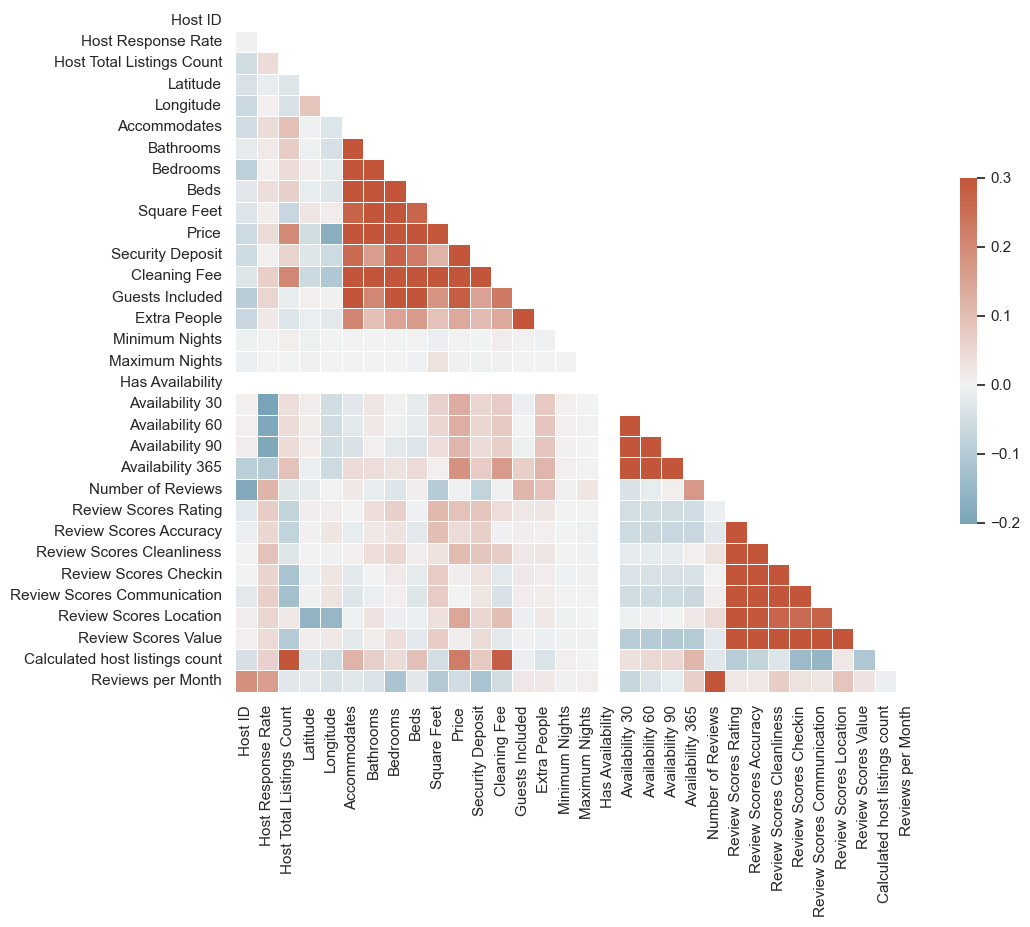

In [12]:
sns.set_theme(style="white")

# Matrice de corrélation
corr = df_num.corr()

# Génération d'un masque pour la partie supérieure du triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mise en place de la figure
f, ax = plt.subplots(figsize=(11, 9))

# Création d'une palette de couleurs
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Tracé de la heatmap avec le masque et les bonnes dimensions
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
#Variables numériques les plus corrélées avec le prix

var_corr = df_num.corr()['Price']
var = var_corr[abs(var_corr) > 0.2].sort_values(ascending=False)
print("Voici les {} variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):\n{}".format(len(var), var))

Voici les 10 variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):
Price                             1.000000
Cleaning Fee                      0.606410
Accommodates                      0.578680
Bedrooms                          0.548549
Beds                              0.506751
Bathrooms                         0.465715
Security Deposit                  0.375173
Square Feet                       0.293823
Guests Included                   0.281018
Calculated host listings count    0.222991
Name: Price, dtype: float64


Ainsi, les variables les plus corrélées au prix sont les frais de nettoyage, la capacité d'accueil, le nombre de chambres, de lits et de salles de bain, la caution, la superficie de l'appartement, le nombre d'invités inclus dans l'annonce de base, le nombre d'annonces de l'hôte, ainsi que l'arrondissement.

### 1.1 Influence de la localisation géographique

In [14]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

Après une rapide analyse, on se rend compte que la variable Neighbourhood Cleansed est moins précise que Neighbourhood
(20 valeurs contre 64) mais elle semble éliminer certaines erreurs et doublons (par exemple, le quartier Cannesqui qui n'existe pas, le 15ème arrondissement qui groupe avec d'autre quartiers...). On utilisera donc cette variable là. 

In [15]:
df['Neighbourhood Cleansed'].describe()

count                 54512
unique                   20
top       Buttes-Montmartre
freq                   6315
Name: Neighbourhood Cleansed, dtype: object

In [16]:
#On produit un tableau qui indique le nombre et le prix moyen des Airbnb par quartier
df_nb = df.groupby('Neighbourhood Cleansed').agg({'Neighbourhood Cleansed':'count', 'Price':'mean'})
df_nb.columns = ['count', 'mean_price']
df_nb.reset_index(inplace=True)
df_nb.sort_values('count', ascending=False, ignore_index=True, inplace=True)

In [17]:
df_nb

,Neighbourhood Cleansed,count,mean_price
0,Buttes-Montmartre,6315,74.813243
1,Popincourt,5381,79.487546
2,Vaugirard,4000,90.633567
3,Entrepôt,3749,82.779616
4,Batignolles-Monceau,3547,88.391819
5,Ménilmontant,2981,65.175444
6,Buttes-Chaumont,2951,66.420285
7,Passy,2895,123.859570
8,Opéra,2391,98.421757
9,Temple,2368,120.041807


On s'aperçoit donc que les prix varient fortement entre les différents quartiers de Paris. On s'intéresse désormais au prix par arrondissement, pour ensuite faire de la visualisation sur carte. 

In [18]:
#Toutes les valeurs prises par la variable Zipcode
df['Zipcode'].unique()

array(['75018', '75004', '75003', '75017', nan, '75019', '75020', '75007',
       '75015', '75006', '75010', '75009', '93300', '75012', '75011',
       '75008', '75013', '75005', '75002', '75001', '75014', '75116',
       '75016', '750018', '92130', '75', '75011\n75011', 'Paris 75004',
       '92300', '75000', '94250', '94160', '76016', '75011 PARIS',
       '92100', '750109', '7015', '92240', '92200', 'adf', 'Paris',
       '700014', '75 018', '93310', '75014\n75014', 'Montmartre',
       '750016', '075016', '93170', '75003\n75003', '78005', '78008',
       '75018e', '75106', '92170'], dtype=object)

On remarque que il y a beaucoup d'imperfections sur cette variable, il faut donc la nettoyer : 
- enlever les Airbnb situés en banlieue (zipcode commencant par 92, 94, ...) 
- regrouper les 75018.0 et 75018 

In [19]:
#on créé la variable arrondissement, on lui donne la valeur 0 par défaut
df['Arrondissement']=0

In [20]:
#on attribue la bonne valeur à la variable arrondissement

df.loc[df["Zipcode"]=="75001", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75001.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75002", "Arrondissement"] = 2
df.loc[df["Zipcode"]=="75002.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75003", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75003.0", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75004", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75004.0", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75005", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75005.0", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75006", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75006.0", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75007", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75007.0", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75008", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75008.0", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75009", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75009.0", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75010", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75010.0", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75011", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75011.0", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75012", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75012.0", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75013", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75013.0", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75014", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75014.0", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75015", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75015.0", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75016", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75016.0", "Arrondissement"] = 16      
df.loc[df["Zipcode"]=="75116", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75116.0", "Arrondissement"] = 16               
df.loc[df["Zipcode"]=="75017", "Arrondissement"] = 17
df.loc[df["Zipcode"]=="75017.0", "Arrondissement"] = 17           
df.loc[df["Zipcode"]=="75018", "Arrondissement"] = 18
df.loc[df["Zipcode"]=="75018.0", "Arrondissement"] = 18    
df.loc[df["Zipcode"]=="75019", "Arrondissement"] = 19
df.loc[df["Zipcode"]=="75019.0", "Arrondissement"] = 19   
df.loc[df["Zipcode"]=="75020", "Arrondissement"] = 20
df.loc[df["Zipcode"]=="75020.0", "Arrondissement"] = 20 

In [21]:
df['Arrondissement'].unique()

array([18,  4,  3, 17,  0, 19, 20,  7, 15,  6, 10,  9, 12, 11,  8, 13,  5,
        2,  1, 14, 16], dtype=int64)

In [22]:
#on enlève tous les Airbnb qui n'ont pas été affectés à une valeur
df = df[df['Arrondissement']> 0]

Commentaire : on avait auparavant 54513 lignes dans le dataframe, on en a désormais 53731, on a donc perdu 800 données en nettoyant la variable liée aux arrondissements. Cette perte n'est pas significative. 

In [23]:
#On affiche le nombre d'airbnb et le prix moyen des airbnb par arrondissement
df_arr = df.groupby('Arrondissement').agg({'Arrondissement':'count', 'Price':'mean'})
df_arr.columns = ['Count', 'Mean_price']
df_arr.reset_index(inplace=True)
df_arr.sort_values('Mean_price', ascending=False, ignore_index=True, inplace=True)

In [24]:
df_arr.head()

,Arrondissement,Count,Mean_price
0,8,1378,155.957571
1,6,1833,141.838798
2,1,1102,141.251589
3,7,1613,139.501863
4,4,1922,131.503904


On remarque que les arrondissements les plus chers de Paris sont le 8e, le 6e et le 1er. 

### 1.2 Disponbilité

Text(0, 0.5, 'Nombre')

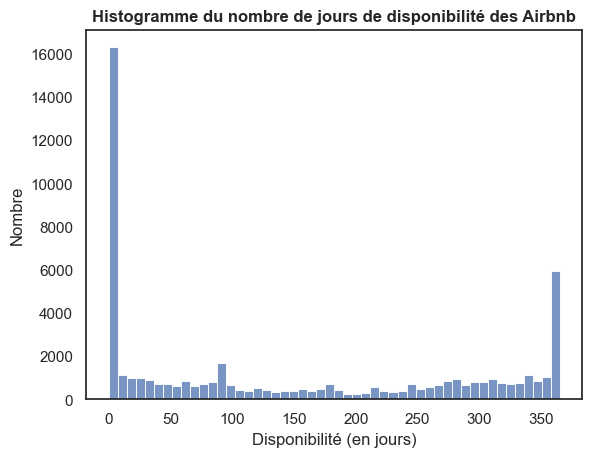

In [25]:
sns.histplot(data=df["Availability 365"],bins=int(50))
plt.title('Histogramme du nombre de jours de disponibilité des Airbnb', weight='bold')
plt.xlabel('Disponibilité (en jours)')
plt.ylabel('Nombre')

In [26]:
a = len(df[df['Availability 365']>300])
b = len(df[df['Availability 365']<60])
c = len(df[df['Availability 365']==0])
a,b,c

(12735, 22374, 14516)

On remarque que près de la moitié des Airbnb sont loués moins de 60 jours par an, ce qui semble correspondre au concept de base de Airbnb - c'est à dire louer sa maison ou son appartement quand on est en vacances ou autre pour arrondir ses fins de mois. 
Cependant, on voit aussi que plus de 12 000 Airbnb sont loués plus de 300 jours par an. On observe donc que certaines personnes louent quasiment en continuité leur logement sur Airbnb pour de courtes périodes, alors qu'ils pourraient le louer sur des longues durées. On peut donc supposer qu'il est plus intéressant financièrement de louer son bien sur Airbnb que en agence par exemple.

### 1.3 Influence de la taille du logement

On a vu dans la matrice de corrélation que la "taille" du logement était fortement corrélée au prix ce qui semble logique. On peut faire quelques statistiques descriptives pour avoir un aperçu des différentes tailles de logement. 

In [27]:
#On remplace les valeurs manquantes par des 0
df = df.fillna(0)

In [28]:
#Nouveau data frame uniquement avec les airbnb où le nb de metre carré est renseigné
df_feet = df.loc[(df['Square Feet'] !=0)]
len(df_feet)

1500

Text(0, 0.5, 'Quantité')

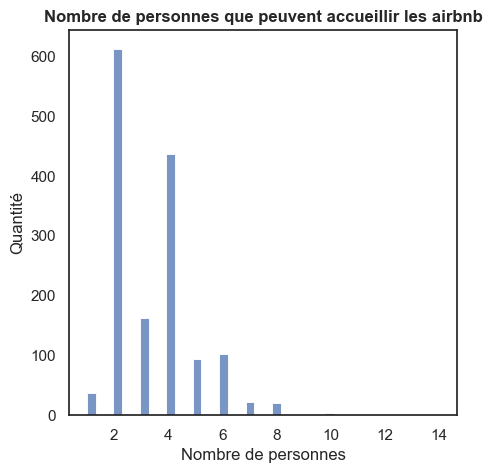

In [29]:
#Répartition du nombres de personnes que peuvent accueillir les Airbnb, pour savoir à quels types de logement on traite
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df_feet['Accommodates'], bins=int(40))
plt.title ('Nombre de personnes que peuvent accueillir les airbnb', weight='bold')
plt.xlabel('Nombre de personnes')
plt.ylabel('Quantité')


La majorité des Airbnb accueillent 2 ou 4 personnes.

In [30]:
df_feet['Square Feet'].describe()

count     1500.000000
mean       543.640667
std        650.643547
min         11.000000
25%        291.000000
50%        431.000000
75%        646.000000
max      15059.000000
Name: Square Feet, dtype: float64

Commentaire : 
- il manque énormément de données sur les superficies : sur plus de 50 000 données à la base, on en a à peine 1500
- Le maximum de surface est de 15000 square feet ce qui correspond à 1393m2, probablement un erreur de saisie donc on va enlever tous les logements ayant une superficie supérieure à 2500 square feet (soit 232m2).

In [31]:
df_feet = df_feet.loc[(df_feet['Square Feet'] < 2500)]

Text(0, 0.5, 'Surface (en m2)')

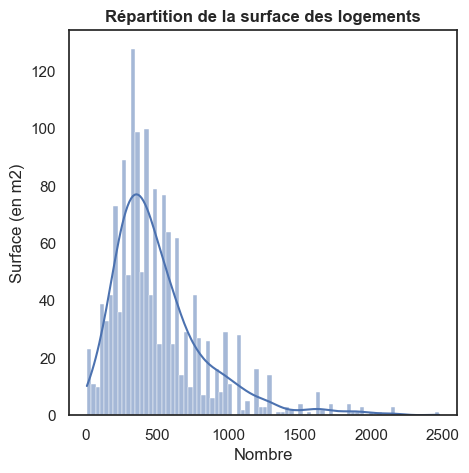

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_feet['Square Feet'], kde=True, bins=int(80))
plt.title ('Répartition de la surface des logements', weight='bold')
plt.xlabel('Nombre')
plt.ylabel('Surface (en m2)')

A cause du nombre très important de données manquantes sur les surfaces des logements, on va désormais s'intéresser au nombre de chambres, de salles de bains, etc... qui sont également des bons indicateurs de la taille du logement.


In [33]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [34]:
df['Bathrooms'].unique()

array([1, 0, 3, 2, 4, 6, 7, 5, 8])

In [35]:
df['Bedrooms'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  6., 10.,  8.])

In [36]:
df_bed = df.groupby('Bedrooms').agg({'Bedrooms':'count'})
df_bed.columns = ['count']
df_bed.reset_index(inplace=True)
df_bed.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bed

,Bedrooms,count
0,1.0,31956
1,0.0,11213
2,2.0,7862
3,3.0,2096
4,4.0,484
5,5.0,91
6,6.0,21
7,7.0,4
8,10.0,2
9,8.0,1


In [37]:
df_bath = df.groupby('Bathrooms').agg({'Bathrooms':'count'})
df_bath.columns = ['count']
df_bath.reset_index(inplace=True)
df_bath.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bath

,Bathrooms,count
0,1,49651
1,2,2914
2,0,721
3,3,308
4,4,59
5,6,30
6,5,22
7,7,13
8,8,12


Plus de 11 000 logements n'ont pas de chambre, on peut donc en déduire que ce sont des studios. La plus grande majorité des logements ont une unique salle de bain. 

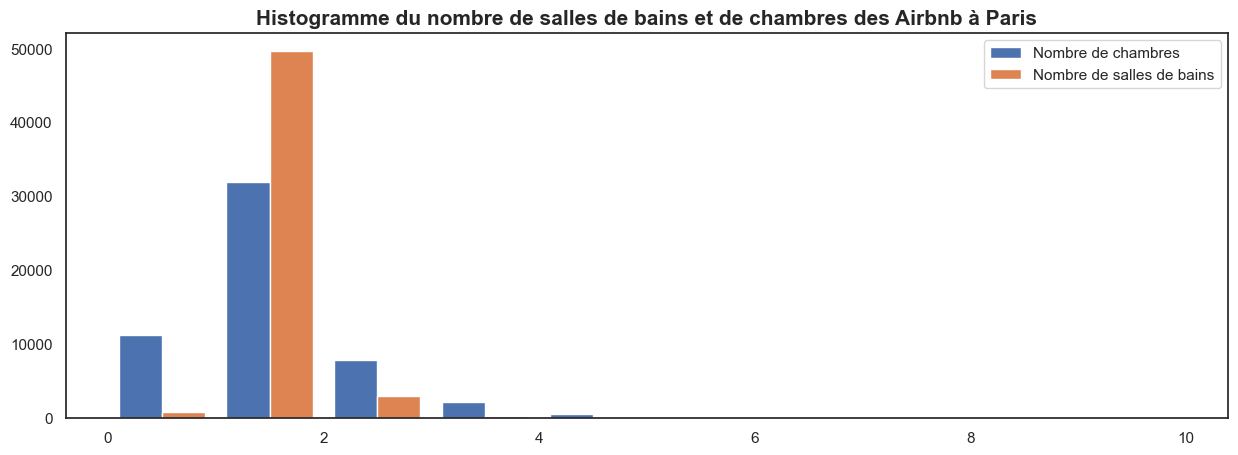

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.hist([df["Bedrooms"], df["Bathrooms"]], label=['Nombre de chambres', 'Nombre de salles de bains'], edgecolor = 'white')
plt.title("Histogramme du nombre de salles de bains et de chambres des Airbnb à Paris",size=15, weight='bold')
plt.legend()


### 1.4 Les reviews

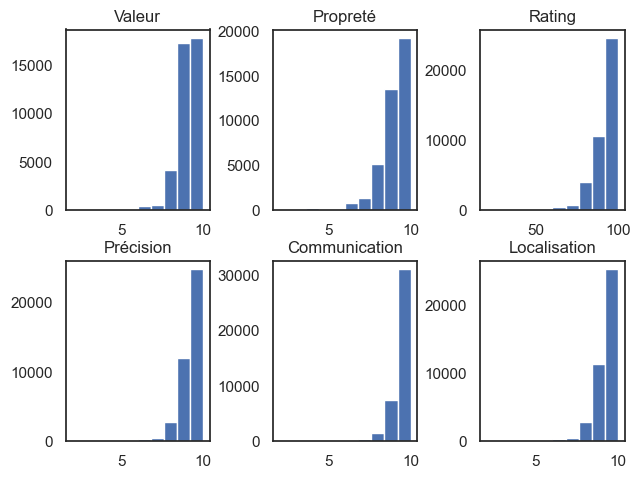

In [39]:

# On regarde la distribution sur les différentes notes données 

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(data["Review Scores Value"]) #row=0, col=0
ax[0, 0].set_title('Valeur')
ax[1, 0].hist(data["Review Scores Accuracy"]) #row=1, col=0
ax[1, 0].set_title('Précision')
ax[0, 1].hist(data["Review Scores Cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Propreté')
ax[1, 1].hist(data["Review Scores Communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(data["Review Scores Location"]) #row=1, col=2
ax[1, 2].set_title('Localisation')
ax[0, 2].hist(data["Review Scores Rating"]) #row=2, col=2
ax[0, 2].set_title('Rating')
plt.show()

In [40]:
#On regarde le nombre d'offres qui n'ont pas de description 
data['Description'].isnull().sum()

7

In [41]:
# Si on ne veut pas fausser l'analyse textuelle et avoir un message d'erreur, il faut enlever les lignes qui correspondent à des valeur manquantes 
def transform(lst) :
  return ([i for item in lst for i in item.lower().split()])
full_reviews = transform(data['Description'].fillna(""))

On peut maintenant s'intéresser à la fréquence des mots sur les descriptions d'appartements, dans le but de regarder le lien potentiel avec les prix des Airbnb


In [42]:

# Fréquence de mots

nb_mots = collections.Counter(full_reviews) 

frq_mots = pd.DataFrame(nb_mots.most_common(8),
                             columns=['mots', 'occurences'])

frq_mots.head()


,mots,occurences
0,the,234341
1,and,167659
2,a,159574
3,de,139466
4,et,92759


On obtient un résultat peu étonnant : les mots qui reviennent le plus sont des mots de liaison, des déterminants ou des conjonctions de coordination (« et »). 
Cependant, ces mots ne vont pas nous être utiles pour faire de l'analyse textuelle sur la qualité des descriptions. 
On va donc essayer d'enlever ces « stopwords », via la méthode vue en cours. 

In [43]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words(['french','english']))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# On ajoute des stop words à la liste initiale, qui était mal configurée 

new_stopwords = ['1', 'one', '2', 'two', 'deux', '3','4','5', '10', '-', ':', ',', 'tout', '!', '.', "d'un", 'rue', 'pied', 'min', 'also', 'Paris', 'paris', 'paris.','paris,', 'parisian', 'place', 'flat', 'floor', 'room', 'bed', 'lit', 'chambre', 'situé', 'logement', 'salle', 'appartement', "l'appartement", 'apartment', 'minutes', 'métro', 'metro', 'studio','kitchen']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)


{'parisian', 'eues', "haven't", 'been', 'c', 'eux', 'eusse', 'bed', 'not', "mustn't", 'll', 'an', 'eue', 'soit', 'son', 'her', 'mightn', 'ne', 'fus', 'ta', 'you', 't', "aren't", "shouldn't", 'rue', 'yours', 'qui', 'aient', 'why', 'than', 'y', "should've", 'des', 'other', '2', 'étiez', "shan't", 'does', "needn't", "didn't", 'during', 'all', 'tes', 'est', 'and', 'm', '5', 'ils', 'auraient', 'avez', 'was', 'but', 'two', 'when', 'between', 'ayez', 'off', 'furent', 'aie', 'his', 'also', 'eûmes', 'by', 'tu', 'how', 'one', 'étante', 'will', 'the', 'on', 'deux', 'wouldn', 'fussiez', 'mon', 'ses', 'au', 'chambre', 'aura', 'as', 'shouldn', 'itself', 'avaient', 'up', 'because', 'ayante', 'into', 'la', 'les', 'étée', 'with', 'aurez', "you've", 'étant', 'était', 'have', 'flat', "won't", 'aurions', 'your', 'paris', 'him', 'me', ',', 'both', '-', 'elle', 'ayantes', "weren't", 'vous', 'were', 'leur', 'its', 'their', 'serait', 'hadn', 'je', 'himself', 'à', 'very', 'do', 'apartment', 'my', 'auras', 'ser

In [45]:

mots_listing = [word for word in full_reviews if word not in new_stopwords_list]
nb_mots_listing = collections.Counter(mots_listing)
nb_mots_listing_df = pd.DataFrame(nb_mots_listing.most_common(33),
                             columns=['words', 'count'])

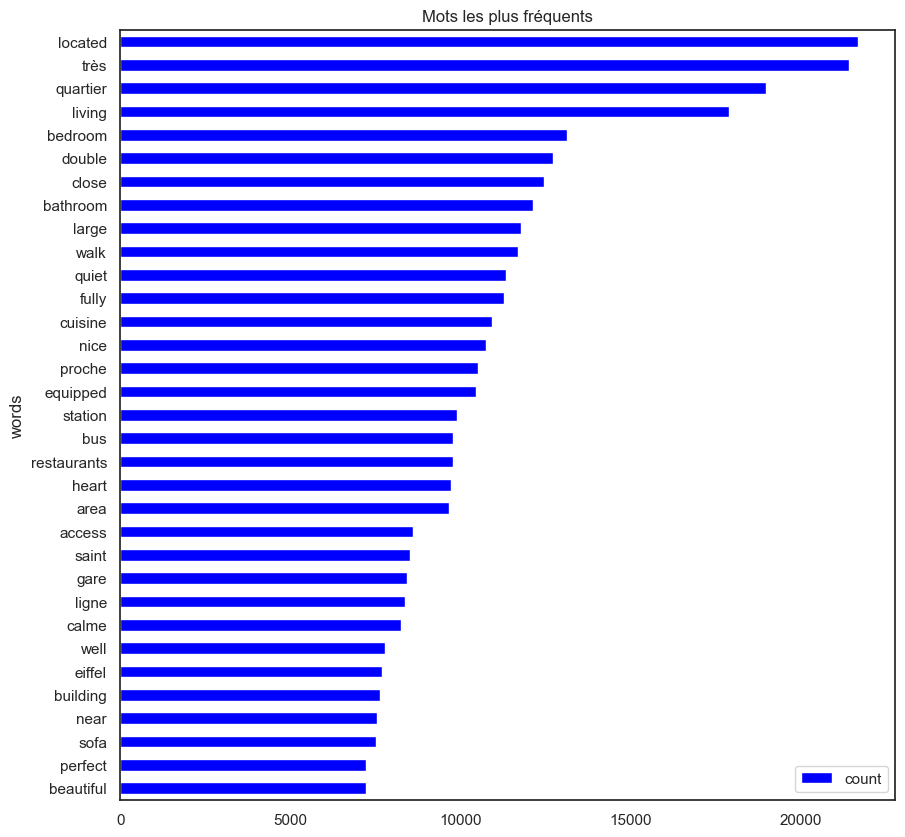

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))

nb_mots_listing_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus fréquents")

plt.show()


In [47]:
# Pour essayer de faire un nuage de mots ####continue d'essayer nadler, beliaive crois en tes rêves


conda install -c conda-forge wordcloud



SyntaxError: invalid syntax (3678542993.py, line 4)

## Modélisation

Puisque les biens traités sont tous uniques, une valeur manquante concernant certaines variables (prix, du nombre de personnes accueillies, dépôt de sécurité...) ne peut pas être remplacée par une valeur moyenne ou médiane ("imputing"). On décide de supprimer les lignes si l'une des variables suivantes est manquante.

In [62]:
df.isnull().sum()

Name                              0
Space                             0
Description                       0
Neighborhood Overview             0
Notes                             0
Transit                           0
Access                            0
Host ID                           0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Total Listings Count         0
Street                            0
Neighbourhood                     0
Neighbourhood Cleansed            0
City                              0
Zipcode                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Square Feet                 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53730 entries, 0 to 54512
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            53730 non-null  object 
 1   Space                           53730 non-null  object 
 2   Description                     53730 non-null  object 
 3   Neighborhood Overview           53730 non-null  object 
 4   Notes                           53730 non-null  object 
 5   Transit                         53730 non-null  object 
 6   Access                          53730 non-null  object 
 7   Host ID                         53730 non-null  int64  
 8   Host Since                      53730 non-null  object 
 9   Host Response Time              53730 non-null  object 
 10  Host Response Rate              53730 non-null  float64
 11  Host Total Listings Count       53730 non-null  float64
 12  Street                          

In [60]:
df = df[df['Cleaning Fee'].notnull()]
df = df[df['Security Deposit'].notnull()]
df = df[df['Bathrooms'].notnull()]
df = df[df['Bedrooms'].notnull()]
df = df[df['Amenities'].notnull()]
df = df[df['Review Scores Rating'].notnull()]
df = df[df['Host Since'].notnull()]
df = df[df['Host Response Time'].notnull()]

In [61]:
df.isnull().sum()

Name                              0
Space                             0
Description                       0
Neighborhood Overview             0
Notes                             0
Transit                           0
Access                            0
Host ID                           0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Total Listings Count         0
Street                            0
Neighbourhood                     0
Neighbourhood Cleansed            0
City                              0
Zipcode                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Square Feet                 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53730 entries, 0 to 54512
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            53730 non-null  object 
 1   Space                           53730 non-null  object 
 2   Description                     53730 non-null  object 
 3   Neighborhood Overview           53730 non-null  object 
 4   Notes                           53730 non-null  object 
 5   Transit                         53730 non-null  object 
 6   Access                          53730 non-null  object 
 7   Host ID                         53730 non-null  int64  
 8   Host Since                      53730 non-null  object 
 9   Host Response Time              53730 non-null  object 
 10  Host Response Rate              53730 non-null  float64
 11  Host Total Listings Count       53730 non-null  float64
 12  Street                          

Maintenant qu'il n'y a plus de valeurs manquantes pour des colonnes essentielles à notre modèle, nous allons transformer des variables qualitatives en variables quantitatives. Par exemple, la variable "Cancellation Policy" peut jouer un rôle très important dans la réservation d'un Airbnb - on aura plutôt tendance à favoriser un Airbnb avec des conditions d'annulation flexibles en cas d'imprévu.

Après lecture des indications liées aux différents modes d'annulation et de remboursement, on décide d'attribuer un score entre 1 et 5 aux annonces ; 5 correspond à "super_strict60", qui laisse très peu de flexibilité aux clients, et 1 à "flexible", qui permet d'annuler jusqu'à 24h à l'avance sans frais.

Il n'y a aucune annonce correspondant à "super_strict_60", donc tous nos listings auront un score entre 1 et 4. On crée la nouvelle variable, puis on la fait correspondre aux politiques d'annulation.

In [56]:
df["Score Annulation"] = 0

In [57]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [58]:
df.loc[df['Cancellation Policy']=='flexible', "Score Annulation"] = 1 
df.loc[df['Cancellation Policy']=='moderate', "Score Annulation"] = 2
df.loc[df['Cancellation Policy']=='strict', "Score Annulation"] = 3
df.loc[df['Cancellation Policy']=='super_strict_30', "Score Annulation"] = 4 

In [59]:
df

,Name,Space,Description,Neighborhood Overview,Notes,Transit,Access,Host ID,Host Since,Host Response Time,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Arrondissement,Score Annulation
0,STUDIO PIGALLE W BALCONY,This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",It is central enough for you to walk your way ...,"Real globetrotters, we are real Parisians with...",The flat is ideally located in Montmartre Piga...,"Subway stations: Abbesses or Pigalle. Bus, Tax...",32492446,2015-05-03,within an hour,...,9.0,9.0,8.0,9.0,strict,7,1.84,"48.88292573377615,2.3358125139068453",18,3
1,Montmartre au pied du Sacré-Coeur !,A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,The apartment is located rue d'Orsel just belo...,The building has a digital code and intercom. ...,The studio is easily accessible. At the foot o...,"The kitchen is equipped with a refrigerator, t...",2726446,2012-06-24,0,...,10.0,10.0,10.0,10.0,moderate,1,0.03,"48.88301302713629,2.343468625865973",18,2
2,LOVELY FLAT MONTMARTRE SACRE COEUR,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,"Situé en plein quartier Montmartre, vous serez...","Situé en plein quartier Montmartre, vous serez...",Très bien desservi par les transports en commu...,0,30432969,2015-04-01,within a few hours,...,10.0,10.0,10.0,10.0,moderate,2,0.89,"48.884043258037266,2.3406044314802927",18,2
3,Appartement au pied de Montmartre,0,"Dans un appartement de 50m², à deux minutes du...",0,0,0,0,42773335,2015-08-28,within a few hours,...,10.0,10.0,10.0,9.0,flexible,1,0.17,"48.88519518071742,2.3451007362886185",18,1
4,Beautiful and Spacious Studio,0,Grd studio lumineux de 32m² avec une grande pi...,0,0,0,0,38757332,2015-07-17,within an hour,...,9.0,10.0,8.0,10.0,flexible,1,0.11,"48.89480043872107,2.3300554723388434",18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54507,Blvd St Germain - Orsay Museum,We are a family of antique dealers and interio...,Cosy and very quiet one bedroom apartment (sle...,The 7th district is one of the most exclusive ...,Our apartment has a king size bed but can be s...,The metro station Rue du Bac (line 12) and the...,"Full usage of the apartment, TV, telephone, Wi...",6887970,2013-06-13,within an hour,...,10.0,10.0,10.0,9.0,flexible,1,0.83,"48.85870242114693,2.3277856646519584",7,1
54508,Rue Cler at 500m from Eiffel Tower!,Ce logement se trouve au 2e étage et comporte ...,"Logement très calme, ensoleillé, situé derrièr...","Quartier ""vivant"" aussi bien de jour comme de ...",0,Très proche du métro École militaire (Métro en...,0,13368008,2014-03-21,within a day,...,9.0,9.0,10.0,9.0,moderate,1,1.06,"48.858121148036595,2.3060024345958587",7,2
54509,Elegant 160m Home in the heart of St Germain,Our home is a large (160m) classic French apar...,Our home is in the heart to Saint-Germain-des-...,St Germain des Pres is the heart of left bank ...,0,0,0,8684576,2013-09-07,within an hour,...,10.0,10.0,10.0,9.0,strict,2,0.56,"48.85289626976821,2.3256957697321123",7,3
54511,2 bedroom appartement in a premium area,0,Situated in a prestigious area near the Rodin ...,Premium neighborhoods with many wonderful cafe...,0,Exellent Transportation from local metros and ...,0,35042224,2015-06-05,0,...,9.0,10.0,10.0,10.0,strict,1,0.34,"48.858549434544635,2.3167999983004584",7,3


De même, on crée une variable numérique Réactivité qui correspond à la qualité de "Host Response Time" ; plus l'hôte répond rapidement, plus le score est bas.

In [ ]:
df["Reactivite"] = 0

In [ ]:
df["Host Response Time"].unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [ ]:
df.loc[df['Host Response Time']=='within an hour', "Reactivite"] = 1 
df.loc[df['Host Response Time']=='within a few hours', "Reactivite"] = 2
df.loc[df['Host Response Time']=='within a day', "Reactivite"] = 3
df.loc[df['Host Response Time']=='a few days or more', "Reactivite"] = 4 

Enfin, on crée une variable "Popu Arrondissement" qui correspond au nombre d'annonces par arrondissement ; en effet, cette variable peut influencer le prix d'une annonce et aussi favoriser une réservation par rapport à une autre annonce.

In [ ]:
df["Popu Arrondissement"]=0

In [ ]:
df['Arrondissement'].unique()

array([18,  4, 17, 19, 15,  7,  9, 10, 12, 11,  8, 13,  6,  5,  1,  3, 20,
        2, 14, 16], dtype=int64)

In [ ]:
listepopu = df.groupby(['Arrondissement']).size()
listepopu


Arrondissement
1      487
2      692
3      887
4      808
5      685
6      736
7      583
8      465
9      656
10    1110
11    1494
12     485
13     400
14     522
15    1066
16     739
17     885
18    1577
19     580
20     651
dtype: int64

In [ ]:
df.loc[df['Arrondissement'] == 1 ,'Popu Arrondissement'] = listepopu[0]

KeyError: 0

In [ ]:
#### A finaliseeeeeeeeeeeeeer

## Importation de toutes les librairies nécessaires à la modélisation

In [48]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ac3e2\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
from geopy.distance import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn



%matplotlib inline

SystemError: initialization of _internal failed without raising an exception

In [104]:

import pickle
import xgboost as xgb
from xgboost import plot_importance


In [105]:
import shap

SystemError: initialization of _internal failed without raising an exception

In [101]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

### Préparation du modèle

Le dataset étant de taille assez conséquente, nous allons le "shuffler" puis le diviser en 5, afin d'avoir 5 samples iid.

In [50]:
df_shuffle = df.sample(frac = 1)
df_shuffle

,Name,Space,Description,Neighborhood Overview,Notes,Transit,Access,Host ID,Host Since,Host Response Time,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Arrondissement
32401,So Paris,"Typical parisien space, like old ""Atelier d'ar...","56 m2 Artist Loft near Pere-Lachaise. Quiet, C...","Pere-Lachaise, nearby, little yards, hidden ev...","Coffee shop, extraordinary, rue de Bagnolet (C...","Metro: Alexandre Dumas, Avron, Buzenval, Maraî...",All of it.,37753996,2015-07-07,within a day,...,10.0,10.0,10.0,10.0,10.0,moderate,1,0.34,"48.856413315060784,2.400558443545223",20
40192,"Quiet, Fresh, canal de l'Ourcq",It is a 2 rooms flat with kitchen and bathroom...,It is a 2 rooms flat with kitchen and bathroom...,0,0,0,0,2746270,2012-06-26,a few days or more,...,8.0,9.0,9.0,9.0,9.0,moderate,1,0.35,"48.88417932709123,2.3731404961595315",19
32842,Conveniently located cozy room close to Bastille,The small (17sqm) room is self-contained and h...,"This 17 sqm room is close to Bastille, from wh...",There are plenty of restaurants in the Neighbo...,0,The room is about 200 meters away from Metro B...,"The room has its own entrance, and is separate...",96634761,2016-09-25,within an hour,...,10.0,10.0,9.0,10.0,9.0,flexible,1,4.76,"48.851116191980175,2.3691129605009174",12
29976,CHARMING ROOM IN MONTMARTRE,"On the top of Montmartre hill, a few meters fr...",Located in the wonderful district of Montmartr...,Montmartre is the greatest place in Paris !,0,"Subway : Lamarck Caulaincourt (Line 12), a few...",0,1106301,2011-09-03,within a few hours,...,10.0,10.0,10.0,9.0,10.0,strict,2,0.12,"48.88986782881918,2.337583833870727",18
45005,Beautiful and spacious apartment,This beautiful 70 sqm apartment was completely...,This lovely apartment rental in Paris offers t...,Located in the trendy 'South Pigalle' neighbor...,This apartment is located on the 3rd floor of ...,"The closest metro station are Blanche, Pigalle...",0,2288803,2012-05-04,within an hour,...,0.0,0.0,0.0,0.0,0.0,strict,70,0.00,"48.88235549891077,2.3345477287711094",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36299,Beautiful apartment (40 m2) located in the hearth,Bright and charming parisian apartment with mo...,Bright and charming parisian apartment with mo...,Our area : Oberkampf - Parmentier Our area is ...,"Vous êtes invités à fumer sur le balcon, en ad...","Our flat is located in the center of Paris, ne...",0,35762463,2015-06-14,0,...,8.0,8.0,8.0,6.0,8.0,flexible,1,0.21,"48.8663442725952,2.3739763441918496",11
20621,Bel appartement contemporain,0,Appartement contemporain avec très grand salon...,0,0,0,0,38908011,2015-07-19,0,...,0.0,0.0,0.0,0.0,0.0,flexible,1,0.00,"48.871150823223935,2.353428035711619",10
48767,Cute flat in Montmartre & Pigalle,"Charming studio very bright, quiet, fully equi...","Charming studio very bright, quiet, fully equi...",The apartment is located at the junction of th...,-,Accessible via the Metro Line 2 (Pigalle or An...,Guests have access to a fully equipped accommo...,1751880,2012-02-14,0,...,9.0,10.0,10.0,10.0,10.0,moderate,1,0.33,"48.883335739145245,2.341053632416726",9
23260,Cozy and new home near Marais for 4,"Very quiet this 2-room apartment comfortable, ...",My calendar is updated and you can book it BUT...,0,0,0,0,1334325,2011-10-25,within an hour,...,9.0,9.0,9.0,9.0,8.0,strict,6,1.16,"48.8676795626689,2.354735269830507",3


In [67]:
df_splits = np.array_split(df_shuffle, 5)
df_splits

[                                           Name  \
 35802                  Chambre  rue des Martyrs   
 28482              Cozy & Classic flat in Paris   
 35774  Grand loft atypique proche centre Paris.   
 11968           Duplex Latin Quarter Notre Dame   
 14135  Cosy 1BR - Arc de Triomphe/Porte Maillot   
 ...                                         ...   
 22963           Cosy appartment near Montmartre   
 43167        Bright & cosy flat near Montmartre   
 20675               Charming flat in Montmartre   
 53198                         Olympia Madeleine   
 31981      Charmant studio nel cuore del Marais   
 
                                                    Space  \
 35802  Chambre de 12m2 , lit double plus un lit d'app...   
 28482  Charming & classic apartment, 2 rooms of 44m2....   
 35774                                                  0   
 11968  This lovely duplex apartment is situated on ru...   
 14135  This apartment of 38 sqm is on the 6th floor (...   
 ...    

In [68]:
df1 = df_splits[0]

On travaillera donc sur 5 subsets.

### Traitement du 1er subset

Text(0.5, 1.0, 'Répartition du nombre de personnes accueillies par Airbnb')

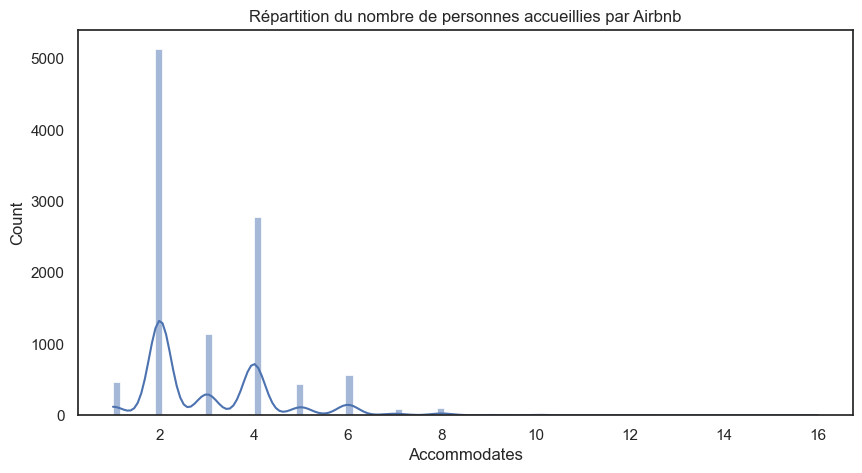

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df1['Accommodates'], kde=True, bins=int(100))
plt.title ('Répartition du nombre de personnes accueillies par Airbnb')

Text(0.5, 1.0, 'Répartition du prix par Airbnb')

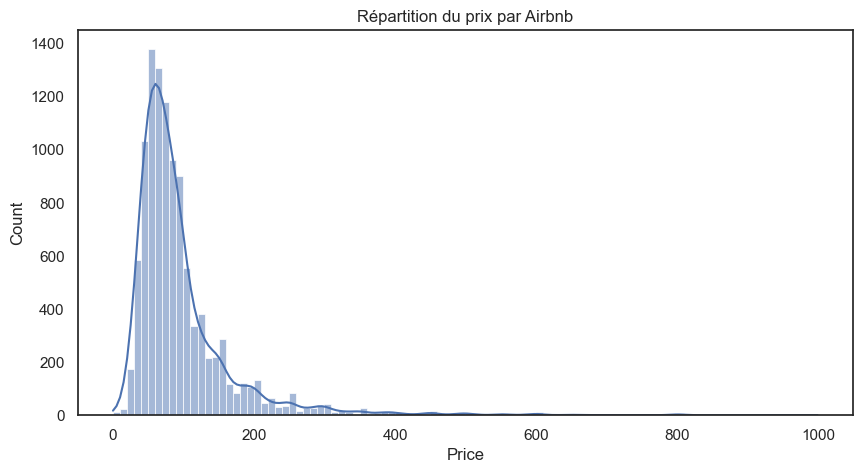

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df1['Price'], kde=True, bins=int(100))
plt.title ('Répartition du prix par Airbnb')

In [71]:
model1 = df1[(df1['Price'] < 400) & (df1['Accommodates'] <= 8)]
list(model1.columns)

['Name',
 'Space',
 'Description',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Time',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Geolocation',
 'Arrondissemen

In [72]:
garde_cols = ['Price', 'Calculated host listings count','Score Annulation', 'Host Response Time', 'Arrondissement', 'Availability 30', 'Availability 365','Has Availability', 'Cleaning Fee']
drop_cols = ['Name','Space','Description','Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Host Response Time',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Security Deposit',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 60',
 'Availability 90',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Reviews per Month',
 'Geolocation',
]

In [73]:
X = model1.copy()
X = X.drop(drop_cols,axis=1)
y = X['Price']


In [75]:
#correlation check

#plt.figure(figsize=(50,30))

#sns.heatmap(X.corr(),
           # annot=True,
            #center=0,
            #cbar=True,
            )

#plt.show()

IndentationError: unexpected indent (487791405.py, line 9)

In [76]:
X.columns, y

(Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
        'Cleaning Fee', 'Availability 30', 'Availability 365',
        'Calculated host listings count', 'Arrondissement', 'Score Annulation'],
       dtype='object'),
 35802     31.0
 28482     72.0
 35774    250.0
 11968    105.0
 14135     99.0
          ...  
 22963     80.0
 43167     80.0
 20675     33.0
 53198     80.0
 31981     50.0
 Name: Price, Length: 10596, dtype: float64)

In [77]:
cols = [x.lower() for x in X.columns.tolist()]
X.columns = cols

In [78]:
df2 = X.copy()
y_copy = y.copy()

In [ ]:
X = X.drop('price', axis = 1)
X.columns

In [79]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [80]:
print(f' X_train shape : {X_train.shape}')
print(f' X_val shape : {X_val.shape}')
print(f' X_test shape : {X_test.shape}')

 X_train shape : (6357, 11)
 X_val shape : (2119, 11)
 X_test shape : (2120, 11)


## Approche par OLS

In [81]:
X_train.head()

,accommodates,bathrooms,bedrooms,beds,price,cleaning fee,availability 30,availability 365,calculated host listings count,arrondissement,score annulation
18575,2,1,0.0,1.0,75.0,50.0,0,118,1,16,2
6517,2,1,1.0,2.0,52.0,0.0,0,0,1,3,1
23074,3,1,1.0,1.0,70.0,27.0,27,87,1,12,1
9652,4,1,2.0,2.0,180.0,0.0,2,267,3,2,2
10651,1,1,1.0,1.0,60.0,0.0,0,177,1,8,1


In [82]:
std = StandardScaler() 
std.fit(X_train.values) 
X_train_scaled = std.transform(X_train.values)
train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
model = sm.OLS(np.array(y_train), sm.add_constant(train_df))

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.221e+32
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:40:40   Log-Likelihood:             1.7997e+05
No. Observations:                6357   AIC:                        -3.599e+05
Df Residuals:                    6345   BIC:                        -3.598e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             90.7137   1.54e-15   5.89e+16      0.000      90.714      90.714
accommodates                    8.185e-14   2.71e-15     30.214      0.000    7.65e-14    8.72e-14
bathrooms                       3.682e-14   1.67e-15     22.073      0.000    3.35e-14    4.01e-14
bedrooms                       -5.686e-14   2.19e-15    -26.014      0.000   -6.11e-14   -5.26e-14
beds                            1.065e-14   2.62e-15      4.068      0.000    5.52e-15    1.58e-14
price                             56.4679   2.24e-15   2.52e+16      0.000      56.468      56.468
cleaning fee                    1.011e-14   1.82e-15      5.541      0.000    6.53e-15    1.37e-14
availability 30                -3.071e-15   2.04e-15     -1.507      0.132   -7.07e-15    9.24e-16
availability 365                3.454e-14   2.07e-15     16.714      0.000    3.05e-14    3.86e-14
calculated host listings count  6.757e-14   1.63e-15     41.412      0.000    6.44e-14    7.08e-14
arrondissement                  3.956e-14   1.68e-15     23.542      0.000    3.63e-14    4.28e-14
score annulation               -4.338e-14   1.69e-15    -25.695      0.000   -4.67e-14   -4.01e-14
==============================================================================
Omnibus:                     1141.630   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5214.870
Skew:                          -0.805   Prob(JB):                         0.00
Kurtosis:                       7.135   Cond. No.                         4.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
std = StandardScaler() 
std.fit(X_train.values) 
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
X_test_scaled = std.transform(X_test.values)

train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
model = sm.OLS(np.array(y_train), sm.add_constant(train_df))

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.221e+32
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:40:54   Log-Likelihood:             1.7997e+05
No. Observations:                6357   AIC:                        -3.599e+05
Df Residuals:                    6345   BIC:                        -3.598e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             90.7137   1.54e-15   5.89e+16      0.000      90.714      90.714
accommodates                    8.185e-14   2.71e-15     30.214      0.000    7.65e-14    8.72e-14
bathrooms                       3.682e-14   1.67e-15     22.073      0.000    3.35e-14    4.01e-14
bedrooms                       -5.686e-14   2.19e-15    -26.014      0.000   -6.11e-14   -5.26e-14
beds                            1.065e-14   2.62e-15      4.068      0.000    5.52e-15    1.58e-14
price                             56.4679   2.24e-15   2.52e+16      0.000      56.468      56.468
cleaning fee                    1.011e-14   1.82e-15      5.541      0.000    6.53e-15    1.37e-14
availability 30                -3.071e-15   2.04e-15     -1.507      0.132   -7.07e-15    9.24e-16
availability 365                3.454e-14   2.07e-15     16.714      0.000    3.05e-14    3.86e-14
calculated host listings count  6.757e-14   1.63e-15     41.412      0.000    6.44e-14    7.08e-14
arrondissement                  3.956e-14   1.68e-15     23.542      0.000    3.63e-14    4.28e-14
score annulation               -4.338e-14   1.69e-15    -25.695      0.000   -4.67e-14   -4.01e-14
==============================================================================
Omnibus:                     1141.630   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5214.870
Skew:                          -0.805   Prob(JB):                         0.00
Kurtosis:                       7.135   Cond. No.                         4.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Haute p-value pour bathrooms

## Regression avec Scikit-Learn

In [84]:
def mae_score(pred, actual):
    return np.mean(np.abs(np.exp(actual) - np.exp(pred)))

In [85]:
lm = LinearRegression() 

lm.fit(X_train_scaled, y_train)

train_pred = lm.predict(X_train_scaled)
val_pred = lm.predict(X_val_scaled)

print(f'Linear Regression train R^2: {lm.score(X_train_scaled, y_train)}')
print(f'Linear Regression val R^2: {lm.score(X_val_scaled, y_val)}')

print("\nTraining MAE:", round(mean_absolute_error(y_train, train_pred),4))
print("Validation MAE:", round(mean_absolute_error(y_val, val_pred),4))

Linear Regression train R^2: 1.0
Linear Regression val R^2: 1.0

Training MAE: 0.0
Validation MAE: 0.0


In [86]:
y_train.describe()

count    6357.000000
mean       90.713701
std        56.472336
min         0.000000
25%        55.000000
50%        75.000000
75%       100.000000
max       399.000000
Name: Price, dtype: float64

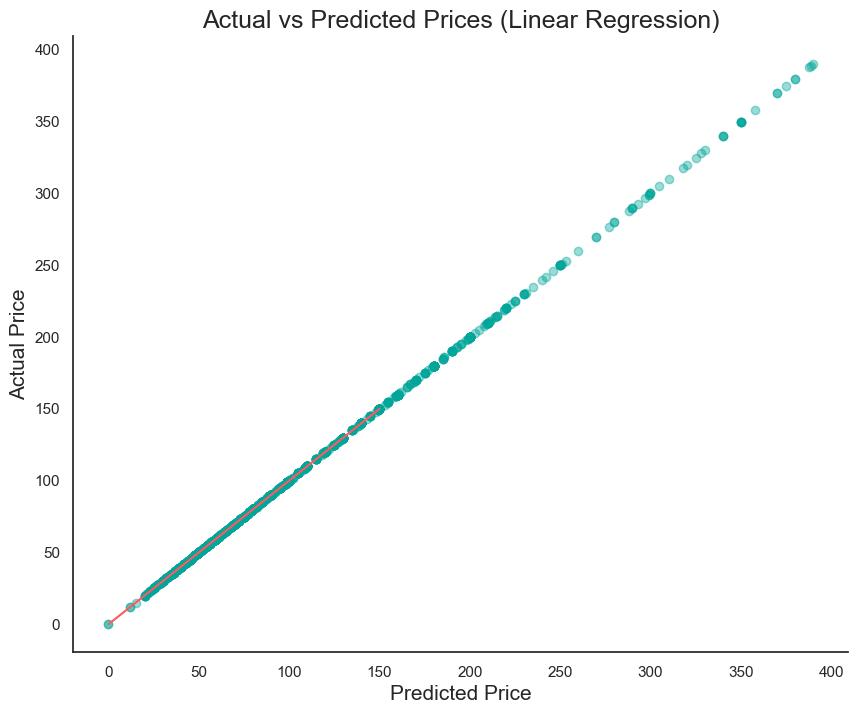

In [87]:
# Plot actual vs predicted
plt.figure(figsize=(10, 8))
plt.plot([0,150], [0,150], c='#FF5A5F')
plt.scatter(val_pred, y_val, color='#00A699', alpha=0.4)
sns.despine()
plt.ylabel('Actual Price', size=15)
plt.xlabel('Predicted Price', size=15)
plt.title('Actual vs Predicted Prices (Linear Regression)', size=18);
plt.savefig('actual_plot', bbox_inches ='tight', dpi = 400)

C:\Users\ac3e2\AppData\Local\Temp\ipykernel_25580\2843111272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val - val_pred, color='#00A699')


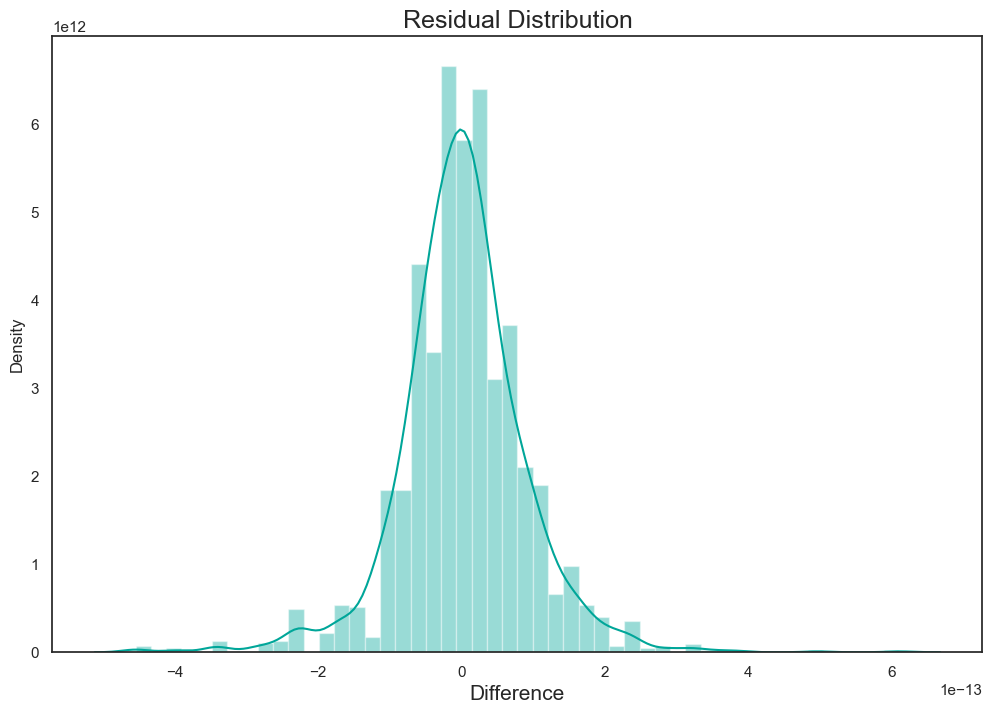

In [88]:
plt.figure(figsize=(12,8))
sns.distplot(y_val - val_pred, color='#00A699') 
plt.title('Residual Distribution', size = 18)
plt.xlabel('Difference', size = 15);
plt.savefig('residuals', bbox_inches ='tight', dpi = 400);

### Regularisation

#### Lasso

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state = 21)

alphavec = 10**np.linspace(-3,3,500)

lasso_model = LassoCV(alphas = alphavec, cv=kf)

lasso_model.fit(X_train_scaled, y_train)

print('LassoCV alpha:', lasso_model.alpha_)

print(f'LassoCV train R^2: {lasso_model.score(X_train_scaled, y_train):.3f}')
print(f'LassoCV val R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')

train_pred = lasso_model.predict(X_train_scaled)
y_val_pred = lasso_model.predict(X_val_scaled)

print('Train MAE for LassoCV:', round(mean_absolute_error(y_train, train_pred),4))
print('Validation MAE for LassoCV:', round(mean_absolute_error(y_val, y_val_pred),4))

LassoCV alpha: 0.001
LassoCV train R^2: 1.000
LassoCV val R^2: 1.000
Train MAE for LassoCV: 0.0046
Validation MAE for LassoCV: 0.0047


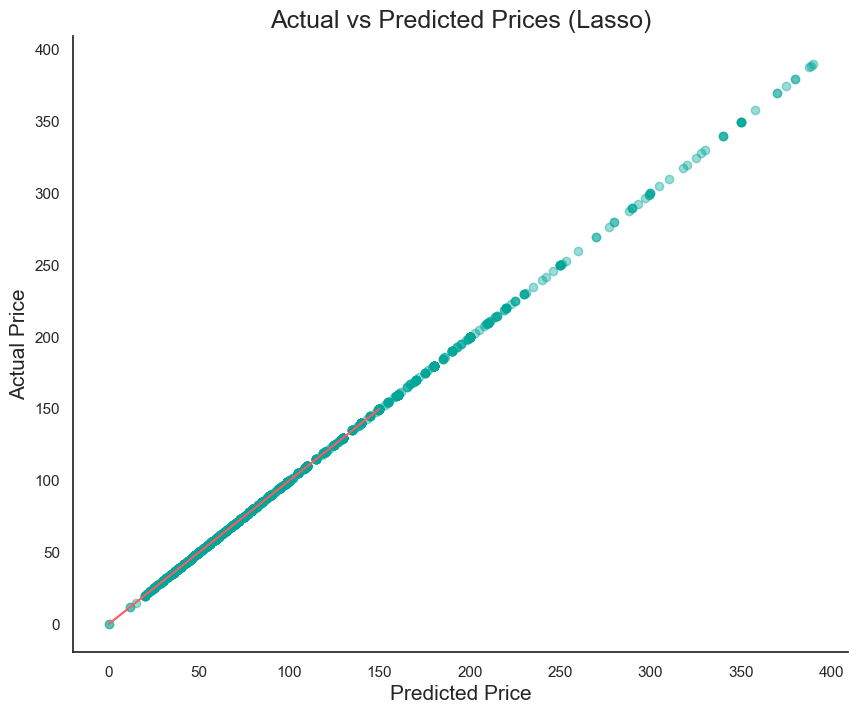

In [90]:
# Plot actual vs predicted
plt.figure(figsize=(10, 8))
plt.plot([0,150], [0,150], c='#FF5A5F')
plt.scatter(y_val_pred, y_val, color='#00A699', alpha=0.4)
sns.despine()
plt.ylabel('Actual Price', size=15)
plt.xlabel('Predicted Price', size=15)
plt.title('Actual vs Predicted Prices (Lasso)', size=18);
plt.savefig('actual plot', bbox_inches ='tight', dpi = 400)

#### Ridge

In [91]:
alphavec = 10**np.linspace(-3,3,500)

ridge_model = RidgeCV(alphas = alphavec, cv=kf)

ridge_model.fit(X_train_scaled, y_train)

print('LassoCV alpha:', ridge_model.alpha_)

print(f'LassoCV train R^2: {ridge_model.score(X_train_scaled, y_train):.3f}')
print(f'LassoCV val R^2: {ridge_model.score(X_val_scaled, y_val):.3f}')

train_pred = ridge_model.predict(X_train_scaled)
y_val_pred = ridge_model.predict(X_val_scaled)

print('Train MAE for LassoCV:', round(mean_absolute_error(y_train, train_pred),4))
print('Validation MAE for LassoCV:', round(mean_absolute_error(y_val, y_val_pred),4))

LassoCV alpha: 0.001
LassoCV train R^2: 1.000
LassoCV val R^2: 1.000
Train MAE for LassoCV: 0.0
Validation MAE for LassoCV: 0.0


#### Coefficients de la régression linéaire

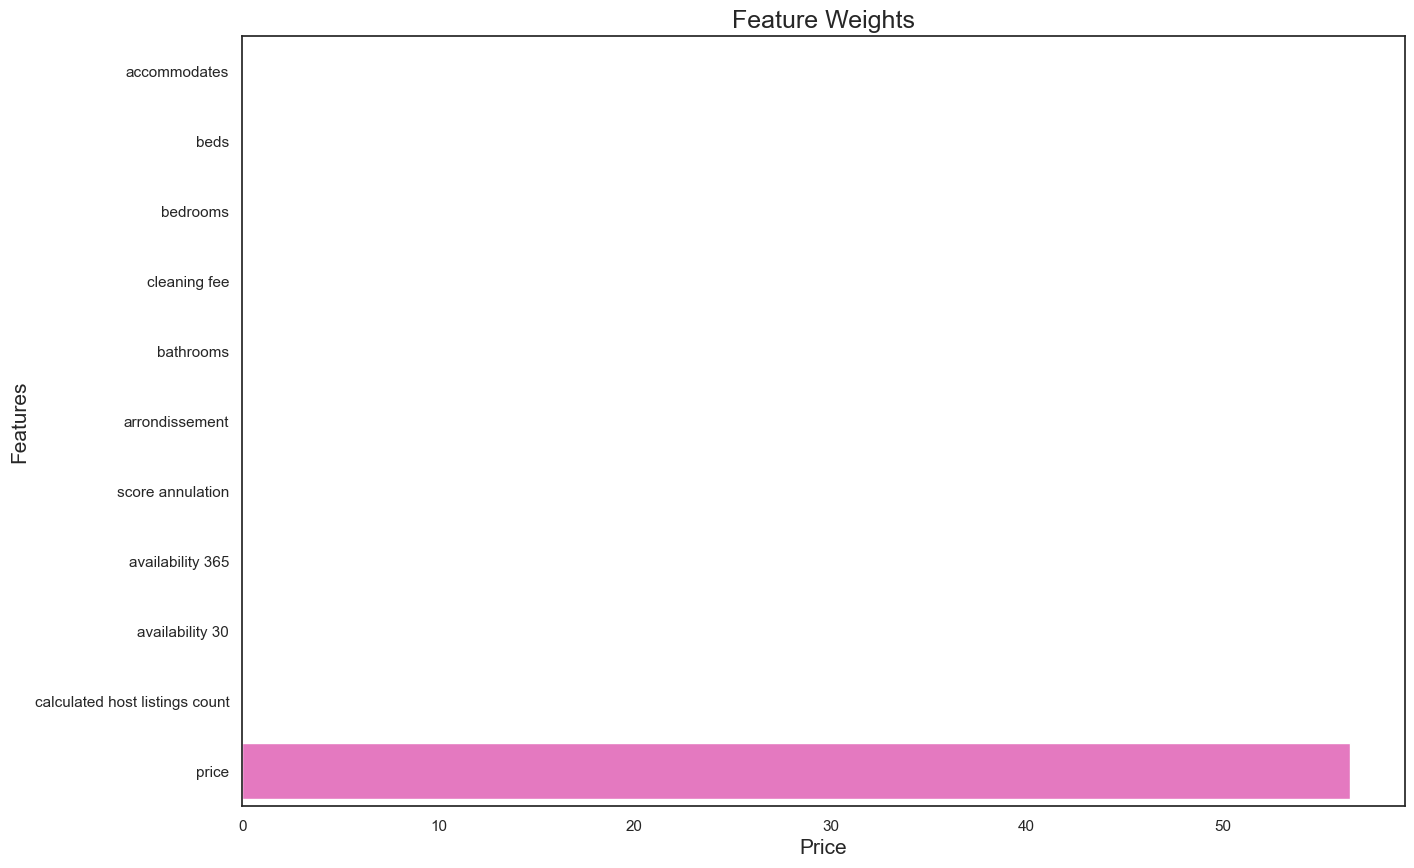

In [92]:
coef_list = sorted(list(zip(X_train.columns, lm.coef_)), key= lambda x : x[1])

x_values = [x[0] for x in coef_list]
y_values = [y[1] for y in coef_list]

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=y_values, y=x_values, palette=("husl"))
#ax.set(xticks=xtick_list)
ax.set_title('Feature Weights', size=18)
ax.set_xlabel('Price', size=15)
ax.set_ylabel('Features', size=15)
plt.savefig('features', bbox_inches ='tight', dpi = 400)

In [93]:
x_values

['accommodates',
 'beds',
 'bedrooms',
 'cleaning fee',
 'bathrooms',
 'arrondissement',
 'score annulation',
 'availability 365',
 'availability 30',
 'calculated host listings count',
 'price']

In [94]:
coefs_df = pd.DataFrame(columns=['Feature', 'Coefficient'])
coefs_df['Feature'] = x_values
coefs_df['Coefficient'] = y_values
coefs_df.to_csv('lr_coefs.csv')
coefs_df

,Feature,Coefficient
0,accommodates,-3.740110e-14
1,beds,-3.197442e-14
2,bedrooms,-3.019807e-14
3,cleaning fee,-1.509903e-14
4,bathrooms,-1.421085e-14
5,arrondissement,-7.660539e-15
6,score annulation,-1.332268e-15
7,availability 365,2.053913e-15
8,availability 30,2.220446e-15
9,calculated host listings count,1.265654e-14


In [95]:
import matplotlib.style as style 

In [96]:
actionable_feats = ['arrondissement', 'reactivite', 'score annulation', 'beds', 'calculated host listings count', 'availability 365', 'availability 30', 'bathrooms', 'accommodates', 'bedrooms', 'cleaning fee']
coefs = coefs = sorted(list(zip(lm.coef_, X.columns)))

coefs = coefs[::-1]
improvements = [x for x in coefs if x[1] in actionable_feats]

improvements

[(1.2656542480726785e-14, 'calculated host listings count'),
 (2.220446049250313e-15, 'availability 30'),
 (2.0539125955565396e-15, 'availability 365'),
 (-1.3322676295501878e-15, 'score annulation'),
 (-7.66053886991358e-15, 'arrondissement'),
 (-1.4210854715202004e-14, 'bathrooms'),
 (-1.509903313490213e-14, 'cleaning fee'),
 (-3.019806626980426e-14, 'bedrooms'),
 (-3.197442310920451e-14, 'beds'),
 (-3.7401097208698424e-14, 'accommodates')]

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (11).

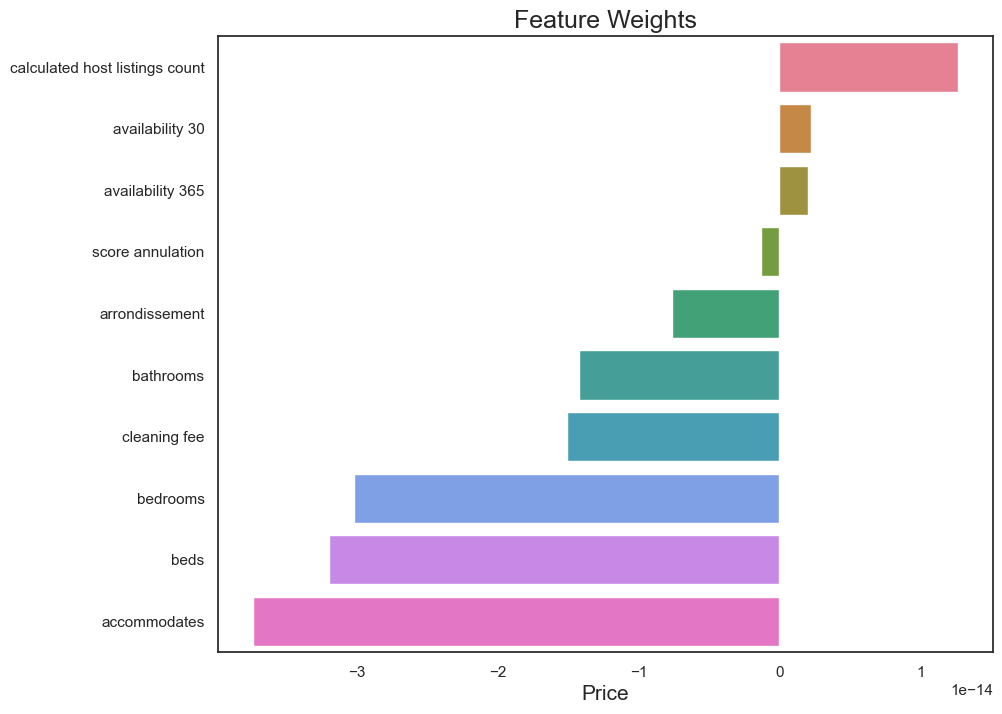

In [97]:

x_values = [x[0] for x in improvements]
y_values = [y[1] for y in improvements]

xtick_list = ['Arrondissement', 'Reactivite', 'Score Annulation', 'Beds', 'Calculated host listings count ', 'Availability 365', 'Availability 30', 'Bathrooms', 'Accomodates', 'Bedrooms', 'Cleaning Fees']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=x_values, y=y_values, palette=("husl"))
#ax.set(xticks=xtick_list)
ax.set_title('Feature Weights', size=18)
ax.set_xlabel('Price', size=15)
ax.set_yticklabels(xtick_list, size=10)
ax.set_ylabel('Features', size=15)
plt.savefig('features', bbox_inches ='tight', dpi = 400)

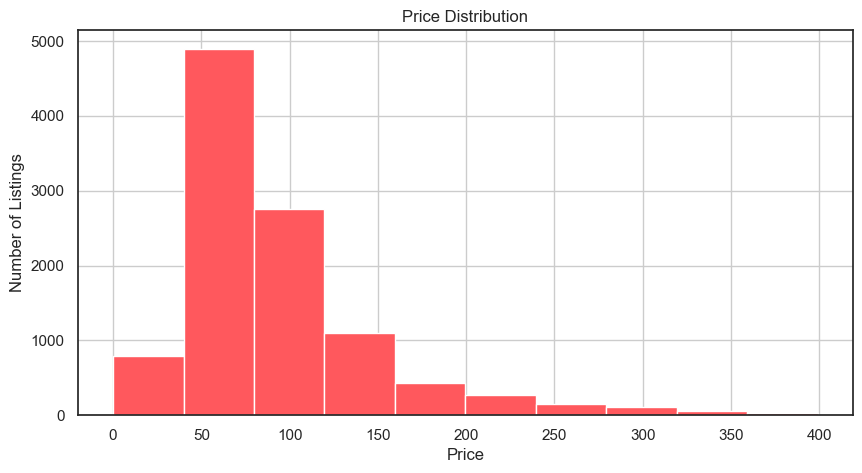

In [98]:
fig, ax = plt.subplots(figsize=(10,5)) 
model1['Price'].hist(color='#FF585D')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Listings');

plt.savefig('Price', bbox_inches ='tight', dpi = 400)

### XGBoost

In [99]:
eval_set = [(X_val, y_val)]

In [106]:
gbm = xgb.XGBRegressor( 
                       n_estimators=10000, #arbitrary large number
                       max_depth=7,
                       objective="reg:squarederror",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.6
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go

xgb_reg = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='mae',
                    early_stopping_rounds=20,
                    verbose=100 #gives output log as below
                   )

[0]	validation_0-mae:81.22291	validation_1-mae:79.80491


c:\Users\ac3e2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\ac3e2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-mae:0.84641	validation_1-mae:1.95138
[200]	validation_0-mae:0.43477	validation_1-mae:1.62302
[300]	validation_0-mae:0.31634	validation_1-mae:1.55516
[400]	validation_0-mae:0.25261	validation_1-mae:1.52626
[500]	validation_0-mae:0.20032	validation_1-mae:1.50490
[600]	validation_0-mae:0.16400	validation_1-mae:1.48923
[700]	validation_0-mae:0.13750	validation_1-mae:1.48244
[800]	validation_0-mae:0.11512	validation_1-mae:1.47319
[900]	validation_0-mae:0.09589	validation_1-mae:1.46838
[1000]	validation_0-mae:0.08104	validation_1-mae:1.46351
[1100]	validation_0-mae:0.06938	validation_1-mae:1.45990
[1200]	validation_0-mae:0.06034	validation_1-mae:1.45750
[1300]	validation_0-mae:0.05352	validation_1-mae:1.45559
[1400]	validation_0-mae:0.04653	validation_1-mae:1.45346
[1500]	validation_0-mae:0.04134	validation_1-mae:1.45187
[1600]	validation_0-mae:0.03660	validation_1-mae:1.45053
[1700]	validation_0-mae:0.03270	validation_1-mae:1.44937
[1800]	validation_0-mae:0.02901	validati

In [107]:
test_pred = xgb_reg.predict(X_test)
print('Test MAE:', round(mean_absolute_error(y_test, test_pred),4))

Test MAE: 1.4104


### GridSearchCV for Best Parameters

In [109]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1],
    'n_estimators': [1000],
    'colsample_bytree':[0.5,0.75],
    'colsample_bylevel':[0.25,0.5],  
}

xgb_gridsearch = GridSearchCV(xgb.XGBRegressor(),
                           xgb_param_grid,
                           cv=5,
                           n_jobs=-1)

xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.25, 0.5],
                         'colsample_bytree': [0.5, 0.75],
                         'learning_rate': [0.1], 'max_depth': [5, 7, 9],
                         'n_estimators': [1000]})

In [110]:
best_xgb = xgb_gridsearch.best_estimator_

In [111]:
test_pred = best_xgb.predict(X_test)
print('Test MAE:', round(mean_absolute_error(y_test, test_pred),4))

Test MAE: 0.8816


In [112]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.75,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [113]:
pickle.dump(best_xgb, open("best_xgb_model.pkl", "wb"))

In [114]:
feat_df = pd.DataFrame(list(zip(X_train.columns, best_xgb.feature_importances_)), 
                       columns=['Feature', 'Weight'])

In [115]:
feat_df = feat_df.sort_values(by=['Weight'], ascending=False)

In [116]:
top_10 = feat_df.head(10)

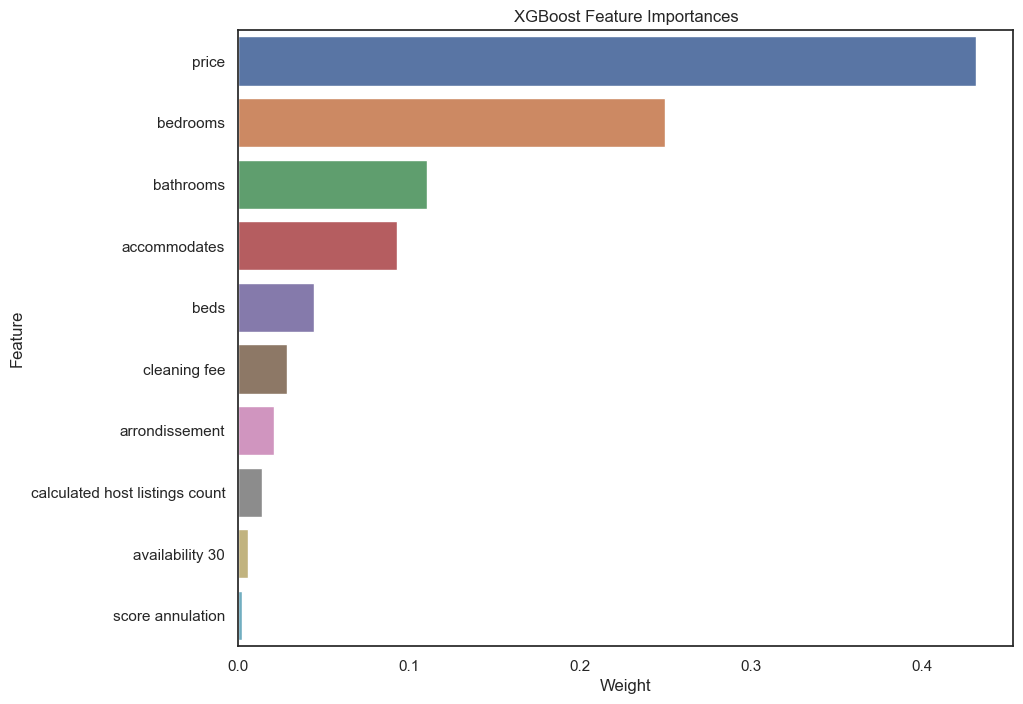

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=top_10['Weight'], y=top_10['Feature'])
ax.set_title('XGBoost Feature Importances');

In [118]:
shap.initjs()
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

NameError: name 'shap' is not defined

In [119]:
shap.summary_plot(shap_values, X_train,max_display=30)

NameError: name 'shap' is not defined

In [120]:
shap.force_plot(explainer.expected_value, shap_values[113,:], X_test.iloc[10,:]) 

NameError: name 'shap' is not defined

In [121]:
shap.dependence_plot("accommodates", shap_values, X_train)

NameError: name 'shap' is not defined

In [122]:
X_display, y_display = shap.datasets.adult(display=True)

NameError: name 'shap' is not defined

In [123]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

NameError: name 'explainer' is not defined

In [124]:
select = range(20,50)
features = X_test.iloc[select]
features_display = X_test.iloc[select]

In [125]:
shap_values = explainer.shap_values(features)[1]

NameError: name 'explainer' is not defined

In [126]:
shap.decision_plot(expected_value, shap_values, features_display)

NameError: name 'shap' is not defined